In [1]:
from Results_DB import Data

Data.keys()

dict_keys(['Ver1', 'Ver2', 'Ver3_4_0_0', 'Ver3_4_0_1', 'Ver3_4_0.1_1', 'Ver3_4_0.03_0.3', 'Ver3_2_0_0', 'Ver3_2_0.1_1'])

In [2]:
K = Data.keys()
N = len(K)
Ver = ['' for _ in range(N)]
Met = [[0 for _ in range(N)] for _ in range(3)]
for i, j in enumerate(K):
    Ver[i] = j
    Met[0][i] = Data[j]['Detection']['hmean'] * 100
    print(j + ': ' + str(Data[j]['Detection']['hmean']))
print('********************************************************')
for i, j in enumerate(K):
    Met[1][i] = Data[j]['Detection']['precision'] * 100
    print(j + ': ' + str(Data[j]['Detection']['precision']))
print('********************************************************')
for i, j in enumerate(K):
    Met[2][i] = Data[j]['Detection']['recall'] * 100
    print(j + ': ' + str(Data[j]['Detection']['recall']))

Ver1: 0.9764450058810942
Ver2: 0.9764450058810942
Ver3_4_0_0: 0.9730636221719818
Ver3_4_0_1: 0.974262205863105
Ver3_4_0.1_1: 0.9744885046359351
Ver3_4_0.03_0.3: 0.9746366800435036
Ver3_2_0_0: 0.9759333589046085
Ver3_2_0.1_1: 0.9751383622047036
********************************************************
Ver1: 0.9732942941691327
Ver2: 0.9732942941691327
Ver3_4_0_0: 0.9736902911397723
Ver3_4_0_1: 0.9713633425765694
Ver3_4_0.1_1: 0.97168001334668
Ver3_4_0.03_0.3: 0.9736632751329397
Ver3_2_0_0: 0.9739700843987633
Ver3_2_0.1_1: 0.9720905026419184
********************************************************
Ver1: 0.9796161825726141
Ver2: 0.9796161825726141
Ver3_4_0_0: 0.9724377593360995
Ver3_4_0_1: 0.9771784232365145
Ver3_4_0.1_1: 0.9773132780082987
Ver3_4_0.03_0.3: 0.9756120331950208
Ver3_2_0_0: 0.9779045643153527
Ver3_2_0.1_1: 0.9782053941908714


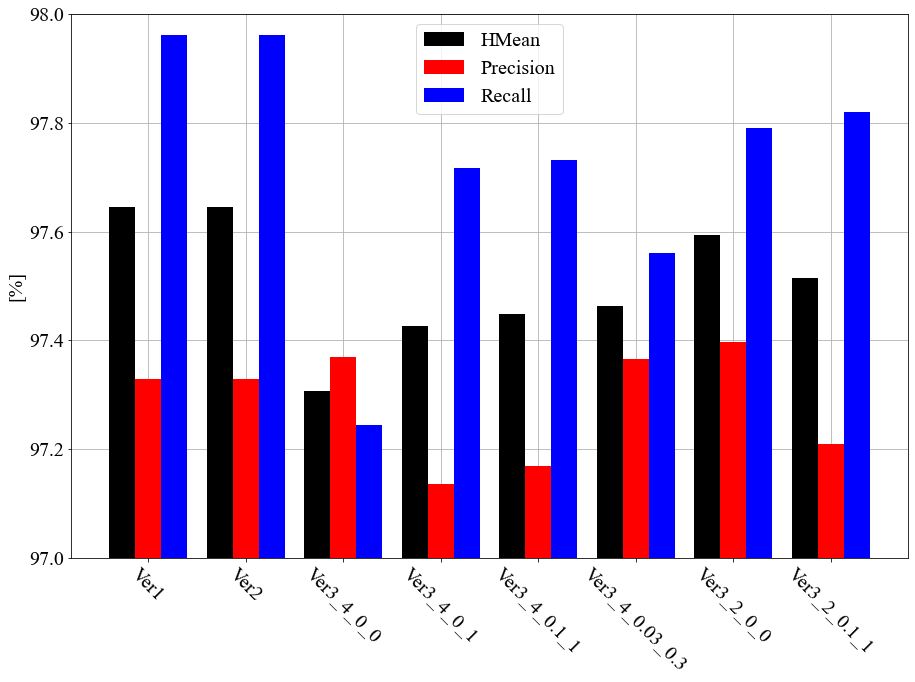

In [3]:
import numpy as np
from matplotlib import pyplot as plt

idx = np.arange(N) * 3
bar_width = 0.8

plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 20

fig = plt.figure(figsize=(15, 10))
fig.set_facecolor('white')
plt.bar(idx, Met[0], bar_width, label='HMean', color='black', zorder=10)
plt.bar(idx + bar_width, Met[1], bar_width, label='Precision', color='red', zorder=10)
plt.bar(idx + bar_width + bar_width, Met[2], bar_width, label='Recall', color='blue', zorder=10)
plt.xticks(idx + bar_width, Ver, rotation=-45)
plt.ylabel('[%]')
plt.ylim([97, 98])
plt.legend()
plt.grid(True)
plt.savefig('test.png', dpi = 300, bbox_inches = 'tight', pad_inches = 0.3, transparent=False)